In [4]:
using LinearAlgebra
dot([1 2 3] , [2 3 4])

20

There are a couple different approaches to how one might deal with optics:

- Closed simple forms
- algebraic surfaces
- signed distance function/ level set surfaces


In [ ]:
function plane(p1,p2,p3)
    v21 = p2 - p1
    v31 = p3 - p1
    n = cross(v21,v31)
    return n, p1 # plane is dot(n, x - p1) == 0
end


struct Ray # ray = p + lam * r
    p
    r
end    

struct Plane # is dot(n, x - p1) == 0
    n
    p
end

struct Sphere
    c
    r
end

struct Ellipse

end

function ray_plane(r, plane )
    # n . (p + lam * r - p2)
    # lam = n . (p - p2) / (n . r)
    return dot(plane.n , r.p - plane.p) / dot(plane.n, ray.r )
end



In [11]:
using Images




┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1278
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278


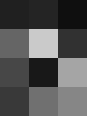

In [12]:
rand(Gray,4,3)

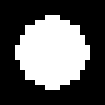

In [25]:

function sphere(c,r,ray)
    # figure out if ray hits sphere
    return 1
end


function raytrace(x,y)
    z = 1
    homog_ray = [x y z 1]
    if x^2 + y^2 <= 0.5 #I'm actually using a 2d signed distance function here.
        return 1
    else
        return 0 
    end
end

box = -1:0.1:1



Gray.([ raytrace(x,y) for x=box, y=box ])
# i actually rather liked the ascii art version.

Homogenous coordinates

Plucker coordinates for rays. https://en.wikipedia.org/wiki/Pl%C3%BCcker_coordinates

a line is an affine combination of points.

p = lam1 x1 + lam2 x2


Projection via ray is very natural here. Just drop the last component.

In homgenous coordianets it is a linear combination of points.
Dually, we can take the plucker coordinates which are the antisymmetric product of the points.


Projection to the 2d projective planes is simply the 3x4 matrix [I 0], dropping the scale column



A ray in 3d is either the join of two points or the meet of two planes. This does feed into the range nullspace picture.
We could perhaps use linear sets





The question is find l such that [x y z l] is a solution

a sphere is xAx = 0   











In [3]:
using Polynomials

x = Polynomial([0,1], :λ)
f = x^2 + 1
f(1)
roots(f)


2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

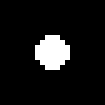

In [28]:
function sphere(x2,y2)
    x = Polynomial([0,x2])
    y = Polynomial([0,y2])
    z = Polynomial([0,1])
    
    p = x^2 + y^2 + (z - 3)^2 - 1
    r = roots(p)
    return any( x -> isreal(x) & (real(x) > 0.0)  , r) ? 1 : 0 
end

box = -1:0.1:1

Gray.([ sphere(x,y) for x=box, y=box ])

In [64]:
using LinearAlgebra

In [77]:
function sphere(x2,y2)
    x3 = [Polynomial([0,x2]), Polynomial([0,y2]), Polynomial([0,1])]
    @polyvar x[1:3]
    p = x[1]^2 + x[2]^2 + (x[3] - 3)^2 - 1
    r = roots(p(x=>x3))
    hits = filter( x -> isreal(x) & (real(x) > 0.0)  , r)
    if length(hits) > 0
        l = minimum(hits)
        x3 = [z(l) for z in x3]
        dp = differentiate(p, x)
        normal = normalize([ z(x=> x3)  for z in dp])
        return dot(normal,[0,1,-1]) 
    else 
        return 0
    end
end

box = -1:0.001:1

Gray.([ sphere(x,y) for x=box, y=box ])
#sphere(0,0)

InterruptException: InterruptException:

In [14]:
using Images
using LinearAlgebra
using TypedPolynomials
using Polynomials

function raytrace(x2,y2,p)
    z = Polynomials.Polynomial([0,1])
    x3 = [z*x2, z*y2, z] # The ray through the origin and the point [x2,x3,1] parametrized by z
    r = roots(p(x=>x3)) # get all the roots after substitution into the surfacv
    hits = map(real, filter( x -> isreal(x) & (real(x) > 0.0)  , r)) # only use values of z that are real and in front of the camera
    if length(hits) > 0
        l = minimum(hits) # closest hit only
        x3 = [z(l) for z in x3]
        dp = differentiate(p, x) # get normal vector of surface at that point
        normal = normalize([ z(x=> x3)  for z in dp])
        return max(0.0, 0.5*dot(normal,normalize([0,1,-1]))) + 0.2 # a little directional and ambient shading
    else 
        return 0 # Ray did not hit surface
    end
end

@polyvar x[1:3]
p = x[1]^2 + x[2]^2 + (x[3] - 3)^2 - 1 # a sphere of radius 1 with center at (0,0,3)
box = -1:0.005:1
#img = Gray.([ raytrace(x,y,p) for x=box, y=box ])
#save("sphere.jpg",img)


-1.0:0.005:1.0

In [17]:
@polyvar x[1:3]
R = 2
r = 1
x1 = x .+ [ 0, 0 , -5 ] # another way of doing offset
p = (x1[1]^2 + x1[2]^2 + x1[3]^2 + R^2 - r^2)^2 - 4R^2 * (x1[1]^2 + x1[2]^2) # a torus at (0,0,5)
box = -1:0.005:1
img = Gray.([ raytrace(x,y,p) for x=box, y=box ])
print(maximum(img))
print(minimum(img))
save("torus.jpg",img)

Gray{Float64}(0.59999400521406)Gray{Float64}(0.0)

In [13]:
max(0,1)

1

In [155]:
@polyvar x[1:3]
R = 2
r = 1
x = x .+ [ 0, 0 , 0 ]
println(x)
p = (x[1]^2 + x[2]^2 + x[3]^2 + R^2 - r^2)^2 - 4R^2 * (x[1]^2 + x[2]^2)
println(p)
typeof(p)

TypedPolynomials.Polynomial{Int64,T,V} where V<:AbstractArray{T,1} where T<:(Term{Int64,M} where M<:Monomial)[x₁, x₂, x₃]
x[1]^4 + 2*x[1]^2*x[2]^2 + 2*x[1]^2*x[3]^2 + x[2]^4 + 2*x[2]^2*x[3]^2 + x[3]^4 - 10*x[1]^2 - 10*x[2]^2 + 6*x[3]^2 + 9


TypedPolynomials.Polynomial{Int64,Term{Int64,Monomial{(x₁, x₂, x₃),3}},Array{Term{Int64,Monomial{(x₁, x₂, x₃),3}},1}}

In [100]:
#@profile raytrace(0,0,p)
#@profile 
#@code_llvm p(x => [1,2,3])
:( y -> $(p(x => y)))

MethodError: MethodError: no method matching substitute(::MultivariatePolynomials.Eval, ::TypedPolynomials.Polynomial{Int64,Term{Int64,Monomial{(x₁, x₂, x₃),3}},Array{Term{Int64,Monomial{(x₁, x₂, x₃),3}},1}}, ::Tuple{Pair{Tuple{Variable{Symbol("x[1]")},Variable{Symbol("x[2]")},Variable{Symbol("x[3]")}},Variable{:y}}})
Closest candidates are:
  substitute(::MultivariatePolynomials.AbstractSubstitutionType, ::MultivariatePolynomials.AbstractPolynomialLike{T} where T, !Matched::Union{Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple{Vararg{Any,N}} where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N}} where N, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N} where N}, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike), Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike)}) at /home/philip/.julia/packages/MultivariatePolynomials/CZWzD/src/substitution.jl:31
  substitute(::MultivariatePolynomials.AbstractSubstitutionType, ::MultivariatePolynomials.AbstractPolynomialLike{T} where T, !Matched::Union{Pair{var"#s36",B} where B where var"#s36"<:MultivariatePolynomials.AbstractVariable, Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple{Vararg{Any,N}} where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N}} where N, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N} where N}, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike), Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike)}, !Matched::Union{Pair{var"#s36",B} where B where var"#s36"<:MultivariatePolynomials.AbstractVariable, Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple{Vararg{Any,N}} where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N}} where N, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N} where N}, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike), Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike)}...) at /home/philip/.julia/packages/MultivariatePolynomials/CZWzD/src/substitution.jl:40
  substitute(::MultivariatePolynomials.AbstractSubstitutionType, ::MultivariatePolynomials.AbstractPolynomial, !Matched::Tuple{Vararg{Union{Pair{var"#s36",B} where B where var"#s36"<:MultivariatePolynomials.AbstractVariable, Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple{Vararg{Any,N}} where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N}} where N, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:Tuple{Vararg{MultivariatePolynomials.AbstractVariable,N} where N}, Pair{var"#s36",var"#s35"} where var"#s35"<:(AbstractArray{T,1} where T) where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike), Pair{var"#s36",var"#s35"} where var"#s35"<:Tuple where var"#s36"<:(AbstractArray{var"#s34",1} where var"#s34"<:MultivariatePolynomials.AbstractMonomialLike)},N} where N}) at /home/philip/.julia/packages/MultivariatePolynomials/CZWzD/src/substitution.jl:56
  ...

In [93]:
typeof(p)

TypedPolynomials.Polynomial{Int64,Term{Int64,Monomial{(x₁, x₂, x₃),3}},Array{Term{Int64,Monomial{(x₁, x₂, x₃),3}},1}}

In [ ]:
using ProfileVega
ProfileVega.view()

In [49]:
:call([x->x, x->x],7)

MethodError: MethodError: objects of type Symbol are not callable

In [51]:
@polyvar x y 
p = 2x + 3.0x*y^2 + y
differentiate(p, x) # compute the derivative of p with respect to x
#(differentiate.(p, (x, y)))((x, y)=>(1, 0))# compute the gradient of p



3.0y² + 2.0

In [53]:
using TypedPolynomials
@polyvar x y # assigns x (resp. y) to a variable of name x (resp. y)
p = 2x + 3.0x*y^2 + y
differentiate(p, x) # compute the derivative of p with respect to x
differentiate.(p, (x, y)) # compute the gradient of p
p((x, y)=>(y, x)) # replace any x by y and y by x
subs(p, y=>x^2) # replace any occurence of y by x^2
p(x=>1, y=>2) # evaluate p at [1, 2]
using TypedPolynomials
A = rand(3, 3)
@polyvar x[1:3] # assign x to a tuple of variables x1, x2, x3
p = sum(x .* x) # x_1^2 + x_2^2 + x_3^2
subs(p, x[1]=>2, x[3]=>3) # x_2^2 + 13


3-element Array{Int64,1}:
 2
 0
 0

In [42]:
using HomotopyContinuation
@var x y; # declare the variables x and y
F = System([x^2+2y, y^2-2])
result = solve(F)

Tracking 4 paths... 100%|███████████████████████████████| Time: 0:00:07
  # paths tracked:                  4
  # non-singular solutions (real):  4 (2)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         4 (2)


Result with 4 solutions
• 4 paths tracked
• 4 non-singular solutions (2 real)
• random_seed: 0x6366f966
• start_system: :polyhedral


Ray tracing with JuMP

We can find the closest point of an object to the camera with jump






Homotopy conituations and hamiltonian optics


free space
(x -x)*2 + (y -y) 
derivative





Matrix ray optics

An approximate ray tracing can be achived by taking a linearization of angles.

A ray is ~   (y , alpha) where alpha = 


